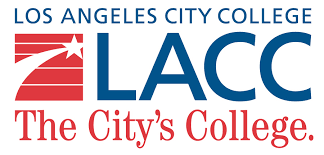

#Inference About Two Means: Independent Samples
#Created by Professor: Edward Pineda-Castro
#Los Angeles City College

# <center>Classical and P-value Method of Hypothesis Testing Regarding Two Means: Independent Samples</center>

**Example 1:** Researchers wanted to determine if carpeted rooms contain more bacteria than uncarpeted rooms.  Their findings are summarized in the table.  Note:  Both sets of data are approximately normal with no outliers.

|         | Carpeted (bacteria/cubic foot) | 11.8 | 8.2 | 7.1 | 13.0 | 10.8 | 10.1 | 14.6 | 14.0 |
| ------- | ------------------------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|         | Uncarpeted (bacteria/cubic foot) | 12.1 | 8.3 | 3.8 | 7.2 | 12.0 | 11.1 | 10.1 | 13.7 |


**(a)**  Do carpeted rooms have more bacteria than uncarpeted rooms at the  level $\alpha$ = 0.05 of significance?



**Step 1: Hypotheses:**

**Enter your answer here:**




**Step 2: test statistic:**

In [ ]:
# Import statistics Library
import statistics
import math

Carpeted = np.array([11.8, 8.2, 7.1, 13.0, 10.8, 10.1, 14.6, 14.0])
Uncarpeted = np.array([12.1, 8.3, 3.8, 7.2, 12.0, 11.1, 10.1, 13.7])

average1 = statistics.mean(Carpeted)
average2 = statistics.mean(Uncarpeted)
stdv1 = statistics.stdev(Carpeted)
stdv2 = statistics.stdev(Uncarpeted)
n1 = len(Carpeted)
n2 = len(Uncarpeted)

t = (average1-average2)/math.sqrt((stdv1**2/n1)+(stdv2**2/n2))

print(t)




0.9557706855732855


**Step 3: Classical Approach (Traditional):**






In [ ]:
from scipy.stats import t

t1 = ((stdv1**2/n1)+(stdv2**2/n2))**2
b1 = (1/(n1-1))*((stdv1**2/n1))**2
b2 = (1/(n2-1))*((stdv2**2/n2))**2

df = t1/(b1+b2)


t.ppf(1-.05,df)

1.7653267333809184


**Step 4: P-value Approach:**








In [ ]:
from scipy.stats import t

1-t.cdf(0.9558,df)

0.17794998654831784

**Step 5: Conclusion in context:**

**Enter your answer here:**

**(b)** Construct and interpret a 99% confidence interval about $\mu_{carpeted}$ - $\mu_{uncarpeted}$.


In [ ]:
#Entere your code here:

**Example 2:**  A researcher randomly selected some business and leisure travelers at an airport and measured their walking speeds.  His findings are summarized in the table.  Note:  Both sets of data are approximately normal with no outliers.

| Type of Traveler        | Business | Leisure |
|-------------------------|----------|---------|
| Mean Speed (ft/min)    | 272      | 261     |
| Standard Deviation (ft/min) | 43       | 47      |
| Sample Size            | 20       | 33      |


**(a)**  Determine whether business travelers walk faster (on average) than leisure travelers at the α = 0.05 level of significance.

**1. State the Hypothesis:**


**Enter your answer here:**

**Step 2: test statistic:**

In [ ]:
# Import statistics Library
import statistics
import math

average1 = 272
average2 = 261
stdv1 = 43
stdv2 = 47
n1 = 20
n2 = 30

t = (average1-average2)/math.sqrt((stdv1**2/n1)+(stdv2**2/n2))

print(t)

0.853551360339012


**Step 3: Classical Approach (Traditional):**

In [ ]:
from scipy.stats import t

t1 = ((stdv1**2/n1)+(stdv2**2/n2))**2
b1 = (1/(n1-1))*((stdv1**2/n1))**2
b2 = (1/(n2-1))*((stdv2**2/n2))**2

df = t1/(b1+b2)


t.ppf(1-.05,df)

1.6808008710113993

**Step 4: P-value Approach:**

In [ ]:
from scipy.stats import t

1-t.cdf(0.8536,df)

0.1990113124169881

**Step 5: Conclusion in context:**

**Enter your answer here:**

**(b)** Construct and interpret a 95% confidence interval about $\mu_{business}$ - $\mu_{leisure}$.

In [ ]:
#Enter your code here:

# <center>Hypothesis Test Function for Regarding Two Means: Independences Samples with Data</center>

In [ ]:
import numpy as np
from scipy.stats import t

def independent_hypothesis_test_2sample(data1, data2, alpha=0.05, tails="two", decimal_places=2):
    # Calculate sample statistics for dataset 1
    sample_mean_1 = np.mean(data1)
    sample_stdev_1 = np.std(data1, ddof=1)  # using ddof=1 for sample standard deviation
    sample_size_1 = len(data1)

    # Calculate sample statistics for dataset 2
    sample_mean_2 = np.mean(data2)
    sample_stdev_2 = np.std(data2, ddof=1)
    sample_size_2 = len(data2)

    # Calculate the pooled standard error
    pooled_se = np.sqrt((sample_stdev_1**2 / sample_size_1) + (sample_stdev_2**2 / sample_size_2))

    # Calculate the t-statistic
    t_stat = (sample_mean_1 - sample_mean_2) / pooled_se

    # Degrees of freedom
    df = sample_size_1 + sample_size_2 - 2

    # Calculate the critical value from the t-distribution
    if tails == "two":
        crit_val = t.ppf(1 - alpha / 2, df)
    elif tails == "left":
        crit_val = t.ppf(alpha, df)
    elif tails == "right":
        crit_val = t.ppf(1 - alpha, df)

    # Calculate the p-value
    if tails == "two":
        p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    elif tails == "left":
        p_val = t.cdf(t_stat, df)
    elif tails == "right":
        p_val = 1 - t.cdf(t_stat, df)

    # Round the results
    t_stat = round(t_stat, decimal_places)
    p_val = round(p_val, decimal_places)
    crit_val = round(crit_val, decimal_places)

    # Display the results
    print(f"Test statistic (t-score): {t_stat}")
    print(f"Critical value: {crit_val}")
    print(f"P-value: {p_val}")

    # Interpretation based on hypothesis test
    if tails == "two":
        conclusion = "significant difference in means" if abs(t_stat) > crit_val else "no significant difference in means"
    elif tails == "left":
        conclusion = "significant difference in means" if t_stat < crit_val else "no significant difference in means"
    elif tails == "right":
        conclusion = "significant difference in means" if t_stat > crit_val else "no significant difference in means"

    print(f"Conclusion: Do not reject the null hypothesis - There is {conclusion} between the two datasets.")


#Enter your values into the function:

In [ ]:
# "left" for one-tailed left, "right" for one-tailed right, "two" for two-tailed
Carpeted = np.array([11.8, 8.2, 7.1, 13.0, 10.8, 10.1, 14.6, 14.0])
Uncarpeted = np.array([12.1, 8.3, 3.8, 7.2, 12.0, 11.1, 10.1, 13.7])

# Two-tailed test with alpha = 0.05
independent_hypothesis_test_2sample(data1=Carpeted, data2=Uncarpeted, alpha=0.05, tails="right", decimal_places=4)


Test statistic (t-score): 0.9558
Critical value: 1.7613
P-value: 0.1777
Conclusion: Do not reject the null hypothesis - There is no significant difference in means between the two datasets.


# <center>Confidence Test Function for Regarding Two Means: Independences Samples with Data</center>

In [ ]:
import numpy as np
from scipy.stats import t

def independent_confidence_interval(data1, data2, conf_interval=0.95, decimal_places=2):
    # Calculate the mean difference
    mean_diff = np.mean(data1) - np.mean(data2)

    # Calculate the standard deviation and sample size for each group
    n1 = len(data1)
    n2 = len(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)

    # Degrees of freedom
    df = n1 + n2 - 2

    # Calculate the critical value from the t-distribution
    crit_val = t.ppf(1 - (1 - conf_interval) / 2, df)

    # Calculate the confidence interval
    se1 = np.std(data1, ddof=1) / np.sqrt(n1)
    se2 = np.std(data2, ddof=1) / np.sqrt(n2)
    margin_of_error = crit_val * np.sqrt(se1**2 + se2**2)
    lower_bound = mean_diff - margin_of_error
    upper_bound = mean_diff + margin_of_error

    # Round the confidence interval bounds
    lower_bound = round(lower_bound, decimal_places)
    upper_bound = round(upper_bound, decimal_places)

    # Calculate sample mean and sample standard deviation
    sample_mean = round(mean_diff, decimal_places)
    sample_std = round(np.sqrt((var1 / n1) + (var2 / n2)), decimal_places)

    # Calculate the confidence interval for the differences
    conf_interval_lower = round(mean_diff - margin_of_error, decimal_places)
    conf_interval_upper = round(mean_diff + margin_of_error, decimal_places)

    print("Sample Mean: {}".format(sample_mean))
    print("Sample Standard Deviation: {}".format(sample_std))
    print("{:.0%} Confidence Interval for the Differences: ({}, {})".format(
        conf_interval, conf_interval_lower, conf_interval_upper))

#Enter your values into the function:

In [ ]:
Carpeted = np.array([11.8, 8.2, 7.1, 13.0, 10.8, 10.1, 14.6, 14.0])
Uncarpeted = np.array([12.1, 8.3, 3.8, 7.2, 12.0, 11.1, 10.1, 13.7])
independent_confidence_interval(data1=Carpeted, data2=Uncarpeted, conf_interval=0.99, decimal_places=4)


Sample Mean: 1.4125
Sample Standard Deviation: 1.4779
99% Confidence Interval for the Differences: (-2.9869, 5.8119)


# <center>Hypothesis Test Function for Regarding Two Means: Independences Samples without Data</center>

In [ ]:
import numpy as np
from scipy.stats import t

def independent_hypothesis_test(SampleMean1, SampleStdev1, SampleSize1, SampleMean2, SampleStdev2, SampleSize2, alpha=0.05, tails="two", decimal_places=2):
    # Calculate the pooled standard error
    pooled_se = np.sqrt((SampleStdev1 ** 2 / SampleSize1) + (SampleStdev2 ** 2 / SampleSize2))

    # Calculate the t-statistic
    t_stat = (SampleMean1 - SampleMean2) / pooled_se

    # Degrees of freedom
    df = SampleSize1 + SampleSize2 - 2

    # Calculate the critical value from the t-distribution
    if tails == "two":
        crit_val = t.ppf(1 - alpha / 2, df)
    elif tails == "left":
        crit_val = t.ppf(alpha, df)
    elif tails == "right":
        crit_val = t.ppf(1 - alpha, df)

    # Calculate the p-value
    if tails == "two":
        p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    elif tails == "left":
        p_val = t.cdf(t_stat, df)
    elif tails == "right":
        p_val = 1 - t.cdf(t_stat, df)

    # Round the results
    t_stat = round(t_stat, decimal_places)
    p_val = round(p_val, decimal_places)
    crit_val = round(crit_val, decimal_places)

    # Display the results
    print("Test statistic (t-score): {}".format(t_stat))
    print("Critical value: {}".format(crit_val))
    print("P-value: {}".format(p_val))

    if tails == "two":
        if abs(t_stat) > crit_val:
            print("Reject the null hypothesis: There is a significant difference in means.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in means.")
    elif tails == "left":
        if t_stat < crit_val:
            print("Reject the null hypothesis: There is a significant difference in means.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in means.")
    elif tails == "right":
        if t_stat > crit_val:
            print("Reject the null hypothesis: There is a significant difference in means.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in means.")




#Enter your values into the function:

In [ ]:
# Example usage


independent_hypothesis_test(SampleMean1=272, SampleStdev1=43, SampleSize1=20, SampleMean2=261, SampleStdev2=47, SampleSize2=33, alpha=0.05, tails="right", decimal_places=4)

Test statistic (t-score): 0.8713
Critical value: 1.6753
P-value: 0.1938
Do not reject the null hypothesis: There is no significant difference in means.


# <center>Confidence Test Function for Regarding Two Means: Independences Samples without Data</center>

In [ ]:
import numpy as np
from scipy.stats import t

def independent_confidence_interval(SampleMean1, SampleStdev1, SampleSize1, SampleMean2, SampleStdev2, SampleSize2, confidence_level=0.95, decimal_places=2):
    # Calculate the pooled standard error
    pooled_se = np.sqrt((SampleStdev1 ** 2 / SampleSize1) + (SampleStdev2 ** 2 / SampleSize2))

    # Degrees of freedom
    df = SampleSize1 + SampleSize2 - 2

    # Calculate the critical value from the t-distribution
    crit_val = t.ppf((1 + confidence_level) / 2, df)

    # Calculate the margin of error
    margin_of_error = crit_val * pooled_se

    # Calculate the confidence interval bounds
    lower_bound = (SampleMean1 - SampleMean2) - margin_of_error
    upper_bound = (SampleMean1 - SampleMean2) + margin_of_error

    # Round the results
    crit_val = round(crit_val, decimal_places)
    margin_of_error = round(margin_of_error, decimal_places)
    lower_bound = round(lower_bound, decimal_places)
    upper_bound = round(upper_bound, decimal_places)

    # Display the confidence interval
    print("{:.0%} Confidence Interval for the difference in means: ({}, {})".format(confidence_level, lower_bound, upper_bound))



#Enter your values into the function:

In [ ]:
independent_confidence_interval(SampleMean1=272, SampleStdev1=43, SampleSize1=20, SampleMean2=261, SampleStdev2=47, SampleSize2=33, confidence_level=0.95, decimal_places=4)


95% Confidence Interval for the difference in means: (-14.3456, 36.3456)
